In [32]:
import h5py
import matplotlib.pyplot as plt
from pprint import pprint

In [33]:
# define constants
SAMPLE_RATE = 25000
DT = 1 / SAMPLE_RATE
FILE_PATH = "/Volumes/WD Passport/DataScienceProject/220113_S1_m.h5"
PRIMARY_COLOUR = "black"
T = 100000

In [34]:
# the data is stored in hdf5 format
def print_structure(name, obj):
    print(name)

with h5py.File(FILE_PATH, "r") as f:

    # view the hdf5 file structure
    f.visititems(print_structure)

    channel_info = f['Data/Recording_0/AnalogStream/Stream_0/InfoChannel']
    names = channel_info.dtype.names

    print("\nExamples Channel Info:\n", channel_info[10], "\nWith corresponding labels:\n", names)

    # Get the values of the first and fifth fields
    keys = channel_info['ChannelID']  # replace 'f0' with the actual name of the first field
    values = channel_info['Label']  # replace 'f4' with the actual name of the fifth field

    # Convert the byte strings to regular strings
    values = [value.decode('utf-8') for value in values]

    # Create the dictionary
    channel_dict = dict(zip(keys, values))

Data
Data/Recording_0
Data/Recording_0/AnalogStream
Data/Recording_0/AnalogStream/Stream_0
Data/Recording_0/AnalogStream/Stream_0/ChannelData
Data/Recording_0/AnalogStream/Stream_0/ChannelDataTimeStamps
Data/Recording_0/AnalogStream/Stream_0/InfoChannel

Examples Channel Info:
 (10, 10, 0, 0, b'16', b'Int', b'V', -12, 0, 40, 122070, 16, b'', b'-1', -1, b'', b'-1', -1) 
With corresponding labels:
 ('ChannelID', 'RowIndex', 'GroupID', 'ElectrodeGroup', 'Label', 'RawDataType', 'Unit', 'Exponent', 'ADZero', 'Tick', 'ConversionFactor', 'ADCBits', 'HighPassFilterType', 'HighPassFilterCutOffFrequency', 'HighPassFilterOrder', 'LowPassFilterType', 'LowPassFilterCutOffFrequency', 'LowPassFilterOrder')


I don't think the process below can be generalise to grids where both dimensions are larger than 10. For example, you would be unable to determine whether the label of 111 corresponds to position (11, 1) or (1, 11).

In [43]:
no_columns = 10
no_rows = 6

channel_dict

layout_dict = []

for key, value in channel_dict.items():
    try:
        if value == 'Ref':
            print(f"Key: {key}, Value: {value}")
        else:
            row = int(value[-1])  # the last digit represents the row
            col = int(value[:-1])  # all the preceding digits represent the column
            
            # check if the row and column numbers are within the correct range
            if 1 <= row <= no_rows and 1 <= col <= no_columns:
                layout_dict.append({"Key": key, "Label": value, "Column": col, "Row": row})
            else:
                print(f"Error! Key: {key}, Value: {value} is out of range!")
    except:
        print(f"Failed at Key: {key}, Value: {value}")



Key: 14, Value: Ref


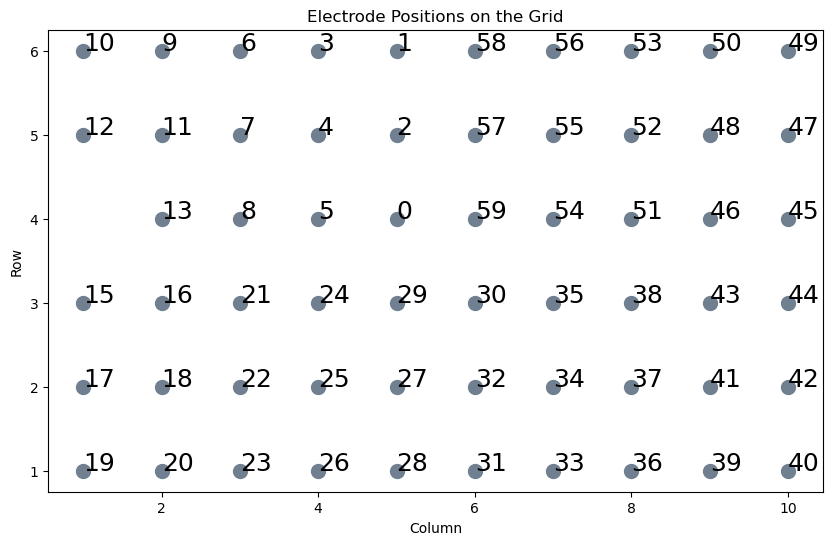

In [57]:
plt.figure(figsize=(10, 6))

for point in layout_dict:
    plt.scatter(point['Column'], point['Row'], s=100, c="slategray")
    plt.text(point['Column'], point['Row'], str(point['Key']), fontsize="18")

plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Electrode Positions on the Grid')
plt.show()